# Sprint 深層学習スクラッチ 畳み込みニューラルネットワーク２

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#2次元の畳み込みニューラルネットワークスクラッチ" data-toc-modified-id="2次元の畳み込みニューラルネットワークスクラッチ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2次元の畳み込みニューラルネットワークスクラッチ</a></span><ul class="toc-item"><li><span><a href="#データセットの用意" data-toc-modified-id="データセットの用意-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>データセットの用意</a></span></li><li><span><a href="#これまでのNNクラスなどの準備" data-toc-modified-id="これまでのNNクラスなどの準備-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>これまでのNNクラスなどの準備</a></span><ul class="toc-item"><li><span><a href="#全結合層" data-toc-modified-id="全結合層-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>全結合層</a></span></li><li><span><a href="#初期化" data-toc-modified-id="初期化-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>初期化</a></span></li><li><span><a href="#最適化" data-toc-modified-id="最適化-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>最適化</a></span></li><li><span><a href="#活性化関数" data-toc-modified-id="活性化関数-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>活性化関数</a></span></li><li><span><a href="#ミニバッチ" data-toc-modified-id="ミニバッチ-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>ミニバッチ</a></span></li></ul></li><li><span><a href="#【問題1】2次元畳み込み層の作成" data-toc-modified-id="【問題1】2次元畳み込み層の作成-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【問題1】2次元畳み込み層の作成</a></span><ul class="toc-item"><li><span><a href="#畳み込み層クラス" data-toc-modified-id="畳み込み層クラス-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>畳み込み層クラス</a></span></li><li><span><a href="#2次元畳み込みの実験" data-toc-modified-id="2次元畳み込みの実験-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>2次元畳み込みの実験</a></span></li></ul></li><li><span><a href="#【問題2】2次元畳み込み後の出力サイズ" data-toc-modified-id="【問題2】2次元畳み込み後の出力サイズ-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>【問題2】2次元畳み込み後の出力サイズ</a></span></li><li><span><a href="#【問題3】最大プーリング層の作成" data-toc-modified-id="【問題3】最大プーリング層の作成-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>【問題3】最大プーリング層の作成</a></span></li><li><span><a href="#【問題4】（アドバンス課題）平均プーリングの作成" data-toc-modified-id="【問題4】（アドバンス課題）平均プーリングの作成-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>【問題4】（アドバンス課題）平均プーリングの作成</a></span></li><li><span><a href="#【問題5】平滑化" data-toc-modified-id="【問題5】平滑化-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>【問題5】平滑化</a></span></li><li><span><a href="#【問題6】学習と推定" data-toc-modified-id="【問題6】学習と推定-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>【問題6】学習と推定</a></span></li><li><span><a href="#【問題7】（アドバンス課題）LeNet" data-toc-modified-id="【問題7】（アドバンス課題）LeNet-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>【問題7】（アドバンス課題）LeNet</a></span></li><li><span><a href="#【問題8】（アドバンス課題）有名な画像認識モデルの調査" data-toc-modified-id="【問題8】（アドバンス課題）有名な画像認識モデルの調査-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>【問題8】（アドバンス課題）有名な画像認識モデルの調査</a></span></li><li><span><a href="#【問題9】出力サイズとパラメータ数の計算" data-toc-modified-id="【問題9】出力サイズとパラメータ数の計算-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>【問題9】出力サイズとパラメータ数の計算</a></span></li><li><span><a href="#【問題10】（アドバンス課題）フィルタサイズに関する調査" data-toc-modified-id="【問題10】（アドバンス課題）フィルタサイズに関する調査-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>【問題10】（アドバンス課題）フィルタサイズに関する調査</a></span></li></ul></li></ul></div>

## このSprintについて
### Sprintの目的
* スクラッチを通してCNNの基礎を理解する

### どのように学ぶか
スクラッチで2次元用畳み込みニューラルネットワークを実装した後、学習と検証を行なっていきます。

## 2次元の畳み込みニューラルネットワークスクラッチ
2次元に対応した畳み込みニューラルネットワーク（CNN）のクラスをスクラッチで作成していきます。  
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。  
  
プーリング層なども作成することで、CNNの基本形を完成させます。  
クラスの名前はScratch2dCNNClassifierとしてください。

### データセットの用意
引き続きMNISTデータセットを使用します。2次元畳み込み層へは、28×28の状態で入力します。

今回は白黒画像ですからチャンネルは1つしかありませんが、チャンネル方向の軸は用意しておく必要があります。

(n_samples, n_channels, height, width)のNCHWまたは(n_samples, height, width, n_channels)のNHWCどちらかの形にしてください。

In [122]:
# インポート
import numpy as np
import matplotlib.pyplot as plt

# 評価指標
from sklearn.metrics import accuracy_score

In [123]:
# MNISTデータセットのダウンロード
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

In [124]:
# データの確認
print(X.shape) # (60000, 28, 28)
print(X.shape) # (10000, 28, 28)
print(X[0].dtype) # uint8

(60000, 28, 28)
(60000, 28, 28)
uint8


In [125]:
# 型変換、正規化
X = X.astype(np.float)
X_test = X_test.astype(np.float)
X /= 255
X_test /= 255
print(X.max()) # 1.0
print(X.min()) # 0.0

1.0
0.0


In [126]:
# 正解ラベル値をone-hotエンコーディング
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y.shape) # (60000,)
print(y_one_hot.shape) # (60000, 10)
print(y_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [127]:
# 訓練データと、検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y_one_hot, test_size=0.2)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000, 10)
(12000, 10)


### これまでのNNクラスなどの準備

#### 全結合層

In [128]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, activation):
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        self.activation = activation
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = self.initializer.W(self.n_nodes1,self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X
        self.A = np.dot(self.X,self.W) + self.B
        
        return self.activation.forward(self.A)
    
    def backward(self, dZ):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dA = self.activation.backward(dZ)
        self.dB = np.mean(dA,axis=0)
        self.dW = np.dot(self.X.T,dA)/len(self.X)
        dZ = np.dot(dA,self.W.T)
        
        # 更新
        self = self.optimizer.update(self)
        
        return dZ

#### 初期化

In [129]:
class SimpleInitializerConv2d:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, F, C, FH, FW):
        """
        重みの初期化
        Parameters
        ----------
        
        Returns
        ----------
        W : 重み
        """
        return self.sigma * np.random.randn(F,C,FH,FW)
    
    def B(self, F):
        """
        バイアスの初期化
        Parameters
        ----------

        Returns
        ----------
        B : バイアス
        """
        return np.zeros(F)

In [130]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W : 重み
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : バイアス
        """
        return np.zeros(n_nodes2)

In [131]:
class HeInitializer():
    """
    Heによる重みの初期化
    """
    def __init__(self):
        pass
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W : 重み
        """
        return np.random.randn(n_nodes1, n_nodes2)*np.sqrt(2/n_nodes1)
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : バイアス
        """
        return np.zeros(n_nodes2)

#### 最適化

In [132]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr*layer.dW
        layer.B -= self.lr*layer.dB
        
        return layer

In [133]:
class AdaGrad:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = 0
        self.hB = 0
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        self.hW += layer.dW*layer.dW
        self.hB = layer.dB*layer.dB
    
        layer.W -= self.lr*layer.dW/(np.sqrt(self.hW) +1e-7)
        layer.B -= self.lr*layer.dB/(np.sqrt(self.hB) +1e-7)
        
        return layer

#### 活性化関数

In [134]:
class ReLU():
    """
    活性化関数 : ReLU関数
    """
    def __init__(self):
        pass
        
    def forward(self,A):
        self.A = A
        return np.maximum(self.A,0)
    
    def backward(self,dZ):
        
        return np.where(self.A>0,dZ,0)

In [135]:
class Softmax():
    """
    活性化関数 : ソフトマックス関数
    """
    def __init__(self):
        pass
        
    def forward(self,A):
        
        return np.exp(A-np.max(A))/np.sum(np.exp(A-np.max(A)),axis=1,keepdims=True)
    
    def backward(self,dZ):
        return dZ

#### ミニバッチ

In [136]:
# ミニバッチ処理のクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=None):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

### 【問題1】2次元畳み込み層の作成
1次元畳み込み層のクラスConv1dを発展させ、2次元畳み込み層のクラスConv2dを作成してください。

フォワードプロパゲーションの数式は以下のようになります。

$$a_{i,j,m} = \sum_{k=0}^{K-1}\sum_{s=0}^{F_{h}-1}\sum_{t=0}^{F_{w}-1}x_{(i+s),(j+t),k}w_{s,t,k,m}+b_{m}$$

#### 畳み込み層クラス

In [137]:
# 2次元畳み込み層クラス
class SimpleConv2d():
    """
    2次元畳み込み層
    Parameters
    ----------
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, F, C, FH, FW, P, S,
                 initializer=None,optimizer=None,activation=None):
        self.P = P
        self.S = S
        self.initializer = initializer
        self.optimizer = optimizer
        self.activation = activation
        
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = self.initializer.W(F,C,FH,FW)
        self.B = self.initializer.B(F)
        
    def output_shape2d(self,H,W,PH,PW,FH,FW,SH,SW):
        OH = (H +2*PH -FH)/SH +1
        OW = (W +2*PW -FW)/SW +1
        return int(OH),int(OW)
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X
        N,C,H,W = self.X.shape
        F,C,FH,FW = self.W.shape
        
        OH,OW = self.output_shape2d(H,W,self.P,self.P,FH,FW,self.S,self.S)
        
        self.params = N,C,H,W,F,FH,FW,OH,OW

        A = np.zeros([N,F,OH,OW])

        self.X_pad = np.pad(self.X,((0,0),(0,0),(self.P,self.P),(self.P,self.P)))

        # バッチ
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(0,H,self.S):
                    # 横方向のスライド
                    for col in range(0,W,self.S):
                        A[n,ch,row,col] = \
                        np.sum(self.X_pad[n,:,row:row+FH,col:col+FW]
                               *self.W[ch,:,:,:]) \
                        +self.B[ch]
        
        return  self.activation.forward(A)
    
    def backward(self, dZ):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        
        dA = self.activation.backward(dZ)
        N,C,H,W,F,FH,FW,OH,OW = self.params
        
        dZ = np.zeros(self.X_pad.shape)
        self.dW = np.zeros(self.W.shape)
        self.dB = np.zeros(self.B.shape)
        
        # dZ
        # バッチ
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(0,H,self.S):
                    # 横方向のスライド
                    for col in range(0,W,self.S):
                        dZ[n,:,row:row+FH,col:col+FW] += dA[n,ch,row,col]*self.W[ch,:,:,:]
                
        dl_rows = range(self.P),range(H+self.P,H+2*self.P,1)
        dl_cols = range(self.P),range(W+self.P,W+2*self.P,1)

        dZ = np.delete(dZ,dl_rows,axis=2)
        dZ = np.delete(dZ,dl_cols,axis=3)
                
        # dW
        # バッチ
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(OH):
                    # 横方向のスライド
                    for col in range(OW):
                        self.dW[ch,:,:,:] += dA[n,ch,row,col]*self.X_pad[n,:,row:row+FH,col:col+FW]
        
        # dB
        # 出力チャンネル
        for ch in range(F):
            self.dB[ch] = np.sum(dA[:,ch,:,:])
        
        # 更新
        self = self.optimizer.update(self)
        
        return dZ

#### 2次元畳み込みの実験

In [138]:
N,C,H,W = (5,1,28,28)
F,C,FH,FW = (4,1,3,3)

S = 1 #とりあえず固定
P = 1

OH,OW = output_shape2d(H,W,P,P,FH,FW,S,S)

A = np.zeros([N,F,OH,OW])

X_sample = X[0:N].reshape(N,C,H,W)
X_pad = np.pad(X_sample,((0,0),(0,0),(P,P),(P,P)))
w = np.ones([F,C,FH,FW])
B = np.ones(F)

# フォワード

# バッチ
for n in range(N):
    # 出力チャンネル
    for ch in range(F):
        # 縦方向のスライド
        for row in range(0,H,S):
            # 横方向のスライド
            for col in range(0,W,S):
                A[n,ch,row,col] = \
                np.sum(X_pad[n,:,row:row+FH,col:col+FW]*w[ch,:,:,:]) +B[ch]
                
print('A.shape:',A.shape)

A.shape: (5, 4, 28, 28)


In [139]:
# バックワード
dA = np.ones(A.shape)

dZ = np.zeros(X_pad.shape)
dW = np.zeros(w.shape)
dB = np.zeros(B.shape)

# dZ
# バッチ
for n in range(N):
    # 出力チャンネル
    for ch in range(F):
        # 縦方向のスライド
        for row in range(0,H,S):
            # 横方向のスライド
            for col in range(0,W,S):
                dZ[n,:,row:row+FH,col:col+FW] += dA[n,ch,row,col]*w[ch,:,:,:]
                
dl_rows = range(P),range(H+P,H+2*P,1)
dl_cols = range(P),range(W+P,W+2*P,1)

dZ = np.delete(dZ,dl_rows,axis=2)
dZ = np.delete(dZ,dl_cols,axis=3)
                
# dW
# バッチ
for n in range(N):
    # 出力チャンネル
    for ch in range(F):
        # 縦方向のスライド
        for row in range(OH):
            # 横方向のスライド
            for col in range(OW):
                dW[ch,:,:,:] += dA[n,ch,row,col]*X_pad[n,:,row:row+FH,col:col+FW]
                
# dB
# 出力チャンネル
for ch in range(F):
    dB[ch] = np.sum(dA[:,ch,:,:])
                
print('dZ.shape:',dZ.shape)
print('dW.shape:',dW.shape)
print('dB.shape:',dB.shape)

dZ.shape: (5, 1, 28, 28)
dW.shape: (4, 1, 3, 3)
dB.shape: (4,)


### 【問題2】2次元畳み込み後の出力サイズ
畳み込みを行うと特徴マップのサイズが変化します。  
どのように変化するかは以下の数式から求められます。  
この計算を行う関数を作成してください。

In [140]:
def output_shape2d(IH=5,IW=5,PH=0,PW=0,FH=3,FW=3,SH=1,SW=1):
    OH = (IH +2*PH -FH)/SH +1
    OW = (IW +2*PW -FW)/SW +1
    return int(OH),int(OW)

In [141]:
print(output_shape2d(IH=6,IW=6,PH=0,PW=0,FH=3,FW=3,SH=1,SW=1))

(4, 4)


### 【問題3】最大プーリング層の作成
最大プーリング層のクラスMaxPool2Dを作成してください。  
プーリング層は数式で表さない方が分かりやすい部分もありますが、数式で表すとフォワードプロパゲーションは以下のようになります。

In [142]:
class MaxPool2D():
    
    def __init__(self,P):
        self.P = P
        self.PA = None
        self.Pindex = None
        
    def forward(self,A):
        N,F,OH,OW = A.shape
        PS = self.P
        PH,PW = int(OH/PS),int(OW/PS)
        
        self.params = N,F,OH,OW,PS,PH,PW
        
        # プーリングフィルター
        self.PA = np.zeros([N,F,PH,PW])
        self.Pindex = np.zeros([N,F,PH,PW])
        
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(PH):
                    # 横方向のスライド
                    for col in range(PW):
                        self.PA[n,ch,row,col] = \
                        np.max(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
                        self.Pindex[n,ch,row,col] = \
                        np.argmax(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
        return self.PA
    
    def backward(self,dA):
        
        N,F,OH,OW,PS,PH,PW = self.params
        dP = np.zeros([N,F,OH,OW])
        
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(PH):
                    # 横方向のスライド
                    for col in range(PW):
                        idx = self.Pindex[n,ch,row,col]
                        tmp = np.zeros((PS*PS))
                        for i in range(PS*PS):
                            if i == idx:
                                tmp[i] = dA[n,ch,row,col]
                            else:
                                tmp[i] = 0
                        dP[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS] = tmp.reshape(PS,PS)
        
        return dP

In [143]:
X = np.random.randint(0,9,36).reshape(1,1,6,6)
print(X)

[[[[3 2 5 5 5 2]
   [1 1 3 4 5 2]
   [1 4 5 4 1 1]
   [4 0 4 3 0 8]
   [0 2 5 0 1 5]
   [6 6 4 7 7 1]]]]


In [144]:
Pooling = MaxPool2D(P=2)
A = Pooling.forward(X)

print(A.shape)
print(A)

(1, 1, 3, 3)
[[[[3. 5. 5.]
   [4. 5. 8.]
   [6. 7. 7.]]]]


In [145]:
Pooling.Pindex

array([[[[0., 0., 0.],
         [1., 0., 3.],
         [2., 3., 2.]]]])

In [146]:
dA = np.random.randint(0,9,9).reshape(A.shape)
print(dA)

[[[[3 0 7]
   [7 7 8]
   [5 7 4]]]]


In [147]:
dZ = Pooling.backward(dA)

print(dZ)

[[[[3. 0. 0. 0. 7. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 7. 7. 0. 0. 0.]
   [0. 0. 0. 0. 0. 8.]
   [0. 0. 0. 0. 0. 0.]
   [5. 0. 0. 7. 4. 0.]]]]


### 【問題4】（アドバンス課題）平均プーリングの作成
平均プーリング層のクラスAveragePool2Dを作成してください。

範囲内の最大値ではなく、平均値を出力とするプーリング層です。

画像認識関係では最大プーリング層が一般的で、平均プーリングはあまり使われません。

In [159]:
class AveragePool2D():
    
    def __init__(self,P):
        self.P = P
        self.PA = None
        self.Pindex = None
        
    def forward(self,A):
        N,F,OH,OW = A.shape
        PS = self.P
        PH,PW = int(OH/PS),int(OW/PS)
        
        self.params = N,F,OH,OW,PS,PH,PW
        
        # プーリングフィルター
        self.PA = np.zeros([N,F,PH,PW])
        
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(PH):
                    # 横方向のスライド
                    for col in range(PW):
                        self.PA[n,ch,row,col] = \
                        np.mean(A[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS])
                        
        return self.PA
    
    def backward(self,dA):
        
        N,F,OH,OW,PS,PH,PW = self.params
        dP = np.zeros([N,F,OH,OW])
        
        for n in range(N):
            # 出力チャンネル
            for ch in range(F):
                # 縦方向のスライド
                for row in range(PH):
                    # 横方向のスライド
                    for col in range(PW):
                        tmp = np.zeros((PS*PS))
                        for i in range(PS*PS):
                            tmp[i] = dA[n,ch,row,col]/(PS*PS)

                        dP[n,ch,row*PS:row*PS+PS,col*PS:col*PS+PS] = tmp.reshape(PS,PS)
        
        return dP

In [160]:
X = np.random.randint(0,9,36).reshape(1,1,6,6)
print(X)

[[[[1 4 4 3 2 1]
   [6 4 1 1 3 2]
   [7 6 7 6 5 6]
   [1 5 0 2 3 8]
   [3 0 2 1 5 1]
   [1 3 7 8 3 0]]]]


In [161]:
Pooling = MeanPool2D(P=2)
A = Pooling.forward(X)

print(A.shape)
print(A)

(1, 1, 3, 3)
[[[[3.75 2.25 2.  ]
   [4.75 3.75 5.5 ]
   [1.75 4.5  2.25]]]]


In [162]:
dA = np.random.randint(0,9,9).reshape(A.shape)
print(dA)

[[[[1 7 1]
   [2 0 7]
   [1 2 0]]]]


In [163]:
dZ = Pooling.backward(dA)

print(dZ)

[[[[0.25 0.25 1.75 1.75 0.25 0.25]
   [0.25 0.25 1.75 1.75 0.25 0.25]
   [0.5  0.5  0.   0.   1.75 1.75]
   [0.5  0.5  0.   0.   1.75 1.75]
   [0.25 0.25 0.5  0.5  0.   0.  ]
   [0.25 0.25 0.5  0.5  0.   0.  ]]]]


### 【問題5】平滑化
平滑化するためのFlattenクラスを作成してください。

フォワードのときはチャンネル、高さ、幅の3次元を1次元にreshapeします。その値は記録しておき、バックワードのときに再びreshapeによって形を戻します。

この平滑化のクラスを挟むことで出力前の全結合層に適した配列を作ることができます。

In [149]:
class Flatten:
    def __ini__(self,):
        pass
    def forward(self,X):
        self.shape = X.shape
        return X.reshape(len(X),-1)

    def backward(self,X):
        return X.reshape(self.shape)        

In [150]:
TEST = np.zeros([20,2,5,5])
flt = Flatten()
flat_forward = flt.forward(TEST)
print('Forward_shape:',flat_forward.shape)
print('Backward_shape:',flt.backward(flat_forward).shape)

Forward_shape: (20, 50)
Backward_shape: (20, 2, 5, 5)


### 【問題6】学習と推定
作成したConv2dを使用してMNISTを学習・推定し、Accuracyを計算してください。

精度は低くともまずは動くことを目指してください。

In [68]:
# スクラッチ　CNN
class Scratch2dCNNClassifier():
    """
    N層の畳み込みニューラルネットワーク分類器
    
    Parameters
    ----------
    self.n_epoch : エポック数
    self.n_batch : バッチ数
    self.verbose : 学習過程を可視化
    Attributes
    ----------
    """
    def __init__(self, NN, CNN, n_epoch=5, n_batch=1, verbose = False):
        #　パラメータ
        self.n_epoch = n_epoch
        self.n_batch = n_batch
        self.verbose = verbose
        self.log_loss = np.zeros(self.n_epoch)
        self.log_acc = np.zeros(self.n_epoch)
        self.NN = NN
        self.CNN = CNN
        
    def loss_function(self,y,yt):
        delta = 1e-7
        return -np.mean(yt*np.log(y+delta))
    
    def accuracy(self,Z,Y):
        return accuracy_score(Y,Z)
                
    def fit(self, X, y, X_val=False, y_val=False):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        for epoch in range(self.n_epoch):
            # ミニバッチ処理
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            
            self.loss = 0
            for mini_X_train, mini_y_train in get_mini_batch:
                                
                # 順伝播
                forward_data = mini_X_train[:,np.newaxis,:,:]
                
                # Conv
                for layer in range(len(self.CNN)):
                    forward_data = self.CNN[layer].forward(forward_data)
                
                # 平滑化
                flt = Flatten()
                forward_data = flt.forward(forward_data)
                
                # NN
                for layer in range(len(self.NN)):
                    forward_data = self.NN[layer].forward(forward_data)
                    
                # 予測値
                Z = forward_data
                
                # 逆伝播
                backward_data = (Z - mini_y_train)/self.n_batch
                for layer in range(len(self.NN)-1,-1,-1):
                    backward_data = self.NN[layer].backward(backward_data)
                    
                backward_data = flt.backward(backward_data)
                
                for layer in range(len(self.CNN)-1,-1,-1):
                    backward_data = self.CNN[layer].backward(backward_data)
                
                # 損失関数
                self.loss += self.loss_function(Z,mini_y_train)
                
            self.log_loss[epoch] = self.loss/len(get_mini_batch)
            self.log_acc[epoch] = self.accuracy(self.predict(X),np.argmax(y,axis=1))
            
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred_data = X[:,np.newaxis,:,:]
        
        # Conv
        for layer in range(len(self.CNN)):
            pred_data = self.CNN[layer].forward(pred_data)
                
        pred_data = flt.forward(pred_data)
        
        # NN
        for layer in range(len(self.NN)):
            pred_data = self.NN[layer].forward(pred_data)
            
        return np.argmax(pred_data,axis=1)

In [110]:
# 全結合層
NN = {0:FC(7840, 400, HeInitializer(), AdaGrad(0.01), ReLU()),
      1:FC(400, 200, HeInitializer(), AdaGrad(0.01), ReLU()),
      2:FC(200, 10, SimpleInitializer(0.01), AdaGrad(0.01), Softmax()),
     }

In [111]:
# 畳み込み層
CNN = {0:SimpleConv2d(F=10, C=1, FH=3, FW=3, P=1, S=1,
                      initializer=SimpleInitializerConv2d(),
                      optimizer=SGD(),
                      activation=ReLU())}

In [112]:
# 学習
cnn1 = Scratch2dCNNClassifier(NN=NN,CNN=CNN,n_epoch=10,n_batch=200,verbose=False)

cnn1.fit(X_train[0:1000],y_train[0:1000])

In [113]:
# 推定
y_pred = cnn1.predict(X_valid[0:100])

# 正解率
accuracy = accuracy_score(np.argmax(y_valid[0:100],axis=1), y_pred)
print('accuracy:{:.3f}'.format(accuracy))

accuracy:0.870


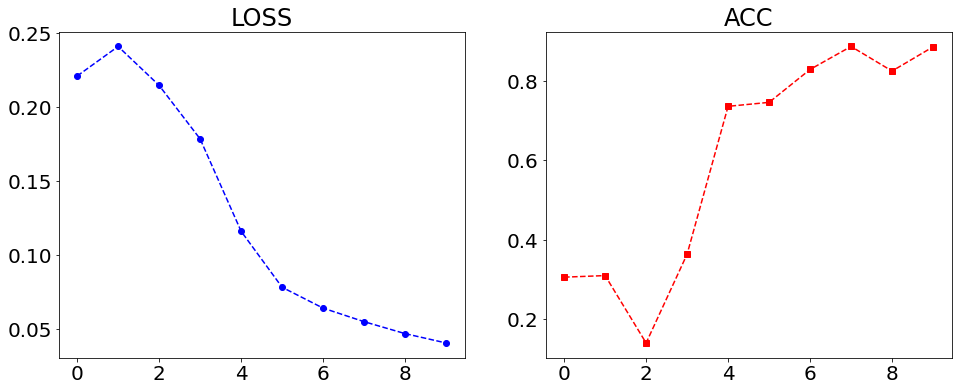

In [114]:
# epochごとの損失関数の可視化
plt.rcParams["font.size"] = 20
fig=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('LOSS')
plt.plot(cnn1.log_loss,'bo--')

plt.subplot(1,2,2)
plt.title('ACC')
plt.plot(cnn1.log_acc,'rs--');

* ミニデータで動かした結果、LOSSは下がってきている、正解率も、それなりになった。

### 【問題7】（アドバンス課題）LeNet
CNNで画像認識を行う際は、フィルタサイズや層の数などを１から考えるのではなく、有名な構造を利用することが一般的です。現在では実用的に使われることはありませんが、歴史的に重要なのは1998年の LeNet です。この構造を再現してMNISTに対して動かし、Accuracyを計算してください。

In [156]:
# LeNet構造
# 畳み込み層
LeNetCNN = {0:SimpleConv2d(F=6, C=1, FH=5, FW=5, P=2, S=1,
                           initializer=SimpleInitializerConv2d(),
                           optimizer=SGD(),
                           activation=ReLU()),
            1:MaxPool2D(P=2),
            2:SimpleConv2d(F=16, C=6, FH=5, FW=5, P=2, S=1,
                           initializer=SimpleInitializerConv2d(),
                           optimizer=SGD(),
                           activation=ReLU()),
            3:MaxPool2D(P=2),}

# 全結合層
LeNetNN = {0:FC(784, 120, HeInitializer(), AdaGrad(0.01), ReLU()),
           1:FC(120, 84, HeInitializer(), AdaGrad(0.01), ReLU()),
           2:FC(84, 10, SimpleInitializer(0.01), AdaGrad(0.01), Softmax()),}

# 学習
LeNet = Scratch2dCNNClassifier(NN=LeNetNN,CNN=LeNetCNN,
                               n_epoch=10,n_batch=200,verbose=False)

LeNet.fit(X_train[0:1000],y_train[0:1000])

In [157]:
# 推定
y_pred_LeNet = LeNet.predict(X_valid[0:500])

# 正解率
accuracy = accuracy_score(np.argmax(y_valid[0:500],axis=1), y_pred_LeNet)
print('accuracy:{:.3f}'.format(accuracy))

accuracy:0.496


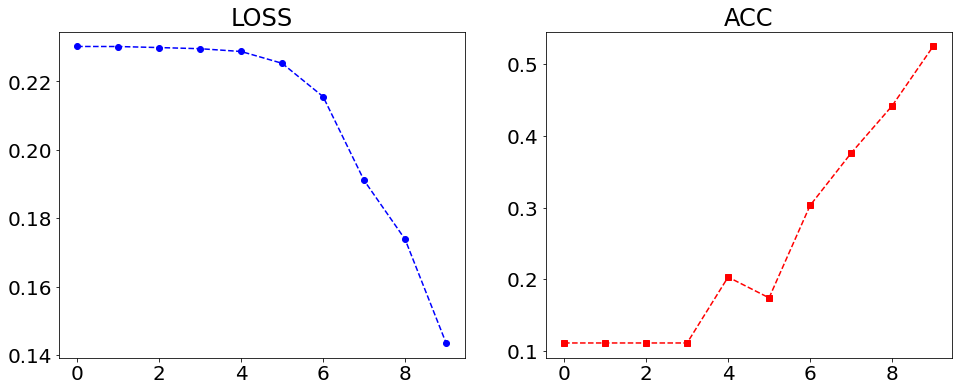

In [158]:
# epochごとの損失関数の可視化
plt.rcParams["font.size"] = 20
fig=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('LOSS')
plt.plot(LeNet.log_loss,'bo--')

plt.subplot(1,2,2)
plt.title('ACC')
plt.plot(LeNet.log_acc,'rs--');

### 【問題8】（アドバンス課題）有名な画像認識モデルの調査
CNNの代表的な構造としてははAlexNet(2012)、VGG16(2014)などがあります。  
こういったものはフレームワークで既に用意されていることも多いです。

どういったものがあるか簡単に調べてまとめてください。名前だけでも見ておくと良いでしょう。

有名なCNN構造
* AlexNet(2012)
* ZFNet(2013)
* GoogleNet(2014)
* VGGNet(2014)
* ResNet(2015)
* SENet(2017)

### 【問題9】出力サイズとパラメータ数の計算
CNNモデルを構築する際には、全結合層に入力する段階で特徴量がいくつになっているかを事前に計算する必要があります。

また、巨大なモデルを扱うようになると、メモリや計算速度の関係でパラメータ数の計算は必須になってきます。フレームワークでは各層のパラメータ数を表示させることが可能ですが、意味を理解していなくては適切な調整が行えません。

以下の3つの畳み込み層の出力サイズとパラメータ数を計算してください。パラメータ数についてはバイアス項も考えてください。

1.

* 入力サイズ : 144×144, 3チャンネル
* フィルタサイズ : 3×3, 6チャンネル
* ストライド : 1
* パディング : なし

→ 出力サイズ : 6×142×142, パラメータ数 : 168(重み162,バイアス6)

2.

* 入力サイズ : 60×60, 24チャンネル
* フィルタサイズ : 3×3, 48チャンネル
* ストライド　: 1
* パディング : なし

→ 出力サイズ : 48×58×58, パラメータ数 : 10416(重み10368,バイアス48)

3.

* 入力サイズ : 20×20, 10チャンネル
* フィルタサイズ: 3×3, 20チャンネル
* ストライド : 2
* パディング : なし

→ 出力サイズ : 20×9×9, パラメータ数 : 1820(重み1800,バイアス20)

＊ 最後の例は丁度良く畳み込みをすることができない場合です。フレームワークでは余ったピクセルを見ないという処理が行われることがあるので、その場合を考えて計算してください。端が欠けてしまうので、こういった設定は好ましくないという例です。

### 【問題10】（アドバンス課題）フィルタサイズに関する調査
畳み込み層にはフィルタサイズというハイパーパラメータがありますが、2次元畳み込み層において現在では3×3と1×1の使用が大半です。以下のそれぞれを調べたり、自分なりに考えて説明してください。

* 7×7などの大きめのものではなく、3×3のフィルタが一般的に使われる理由  
  → パラメータの数が膨大になるから。(サイズの2乗)  
    畳み込みを行う目的が、入力パラメータ間の（位置関係なども含む）特徴の抽出のため、
    フィルタサイズを大きくすることは、目的に反している、、、
  
  
* 高さや幅方向を持たない1×1のフィルタの効果  
  → 入力チャンネルより出力チャンネルを減らすことで、パラメータを減らすことができる。
  

* （おまけ）フィルタサイズは、奇数が推奨される。  
  → 奇数だとフィルタの中心が定めるが、偶数だと中心が定まらない。